In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [76]:
class subject:
    montage = mne.channels.make_standard_montage('standard_1020')
    ch_map = {'Fc5': 'FC5',
              'Fc3': 'FC3',
              'Fc1': 'FC1',
              'Fcz': 'FCz',
              'Fc2': 'FC2',
              'Fc4': 'FC4',
              'Fc6': 'FC6',
              'Cp5': 'CP5',
              'Cp3': 'CP3',
              'Cp1': 'CP1',
              'Cpz': 'CPz',
              'Cp2': 'CP2',
              'Cp4': 'CP4',
              'Cp6': 'CP6',
              'Af7': 'AF7',
              'Af3': 'AF3',
              'Afz': 'AFz',
              'Af4': 'AF4',
              'Af8': 'AF8',
              'Ft7': 'FT7',
              'Ft8': 'FT8',
              'Tp7': 'TP7',
              'Tp8': 'TP8',
              'Po7': 'PO7',
              'Po3': 'PO3',
              'Poz': 'POz',
              'Po4': 'PO4',
              'Po8': 'PO8'}

    def __init__(self,sbj,rec):
        self.edf_loc = '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
        self.data = mne.io.read_raw_edf(self.edf_loc)
        self.data.rename_channels(lambda x: x.strip('.'))
        self.data.rename_channels(self.ch_map)
        self.data.set_montage(self.montage)
        self.events, self.event_id = mne.events_from_annotations(self.data)
        self.epochs = mne.Epochs(self.data, self.events, self.event_id, baseline=(None,None))
        self.info = self.data.info

    def rename_channels(self):
        print(self.data)
        
        
    def topoplot(self):
            
        self.tmin = 0
        self.tmax = 60
        
        self.epochs_params = dict(events=self.events, event_id = self.event_id, tmin=self.tmin, tmax=self.tmax)
        self.eeg_ref = mne.Epochs(self.data, **self.epochs_params, baseline=(None, None)).average()
    
        self.eeg_ref.plot_topomap(times=np.linspace(1,self.tmax,5), size=3., title='Topo_plot', time_unit='s');
        
        
    def calc_connectivity(self):
        self.fmin=4
        self.fmax=8
        
        self.how_many = (self.fmax-self.fmin)
        self.eeg_data = self.data.get_data()
        print('ok')
        self.plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(self.epochs,method='plv', 
                                                indices=None, mode='cwt_morlet', sfreq=self.info['sfreq'], 
                                                fmin=self.fmin, fmax=self.fmax, faverage=True, 
                                                cwt_freqs=np.linspace(self.fmin,self.fmax,self.how_many), 
                                                cwt_n_cycles=1, n_jobs=1)
        
    def calc_centrality():
        pass
        
     

In [77]:
sub1.info

<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S003/S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


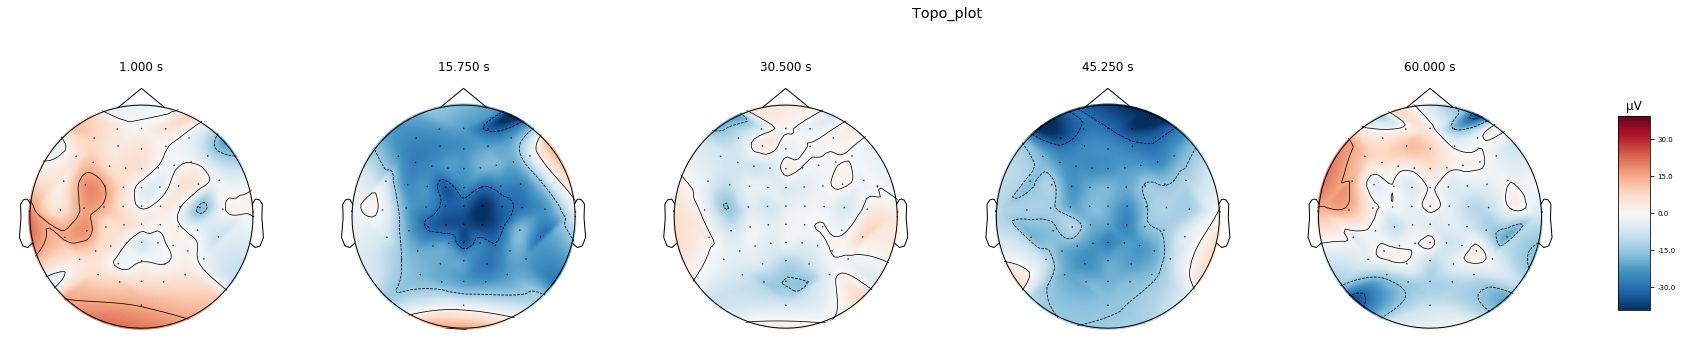

In [78]:
sub1 = subject('003','04')
sub1.topoplot()

In [79]:
sub1.calc_connectivity()

ok
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2016 connections
    using t=0.000s..0.700s for estimation (113 points)
    frequencies: 4.0Hz..8.0Hz (4 points)
    connectivity scores will be averaged for each band
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLV
    computing connectivity for epoch 1
    computing connectivity for epoch 2


<ipython-input-76-68c300c45dac>:68: RuntimeWarning: fmin=4.000 Hz corresponds to 2.825 < 5 cycles based on the epoch length 0.706 sec, need at least 1.250 sec epochs or fmin=7.080. Spectrum estimate will be unreliable.
  cwt_n_cycles=1, n_jobs=1)


    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    com

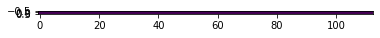

In [94]:
plt.imshow(sub1.plv[1][1])